In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

from scipy.linalg import toeplitz

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') 
plt.rcParams.update({'font.size':14})
plt.rcParams["font.family"] = "Times New Roman"

## Column space

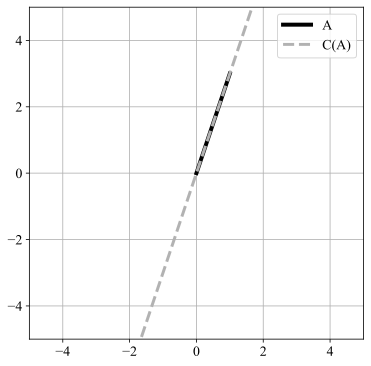

In [3]:
A = np.array([[1], [3]])

xlim = [-5,5]
colspace_p1 = xlim[0]*A
colspace_p2 = xlim[1]*A

plt.figure(figsize=(6,6))

plt.plot([0, A[0,0]], [0, A[1,0]], 'k', linewidth=4, label='A') #원점에서 A : (0, 1) ,(0, 3) 까지 연결
plt.plot([colspace_p1[0,0], colspace_p2[0,0]], [colspace_p1[1,0], colspace_p2[1,0]], 
         '--', linewidth=3, color=[.7,.7,.7], label='C(A)') #원점에서 -5,5배한 열공간 시각화

plt.xlim(xlim)
plt.ylim(xlim)
plt.legend()
plt.grid()
plt.savefig('Figure_05_01.png', dpi=600)
plt.show()

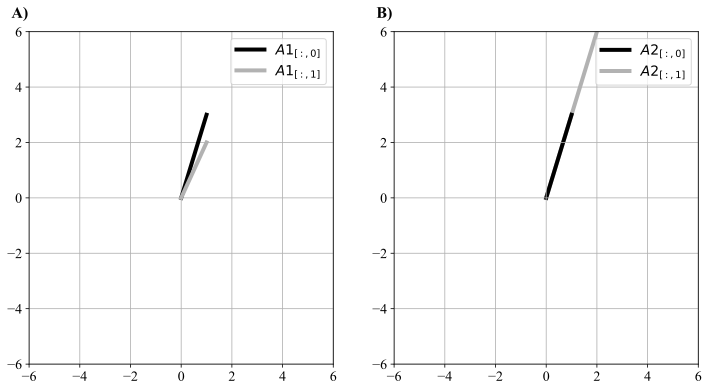

In [4]:
A1 = np.array([[1,1],[3,2]])
A2 = np.array([[1,2],[3,6]])

xlim = [-6,6]
color = [[0,0,0], [.7,.7,.7]]

_, axs = plt.subplots(1,2, figsize=(12,6))

for i in range(2):
    axs[0].plot([0, A1[0,i]], [0, A1[1,i]], color=color[i], linewidth=4)
    axs[1].plot([0, A2[0,i]], [0, A2[1,i]], color=color[i], linewidth=4, zorder=-i) #zorder=-i : 두 벡터가 겹칠 경우, 첫번째 벡터를 위에 보이게 조절(값이 클수록 윗순서로 정렬됨)

    axs[i].set_xlim(xlim)
    axs[i].set_ylim(xlim)
    axs[i].grid()
    axs[i].text(xlim[0]-.7, xlim[1]+.5, f'{"AB"[i]})', fontweight='bold', fontsize=16) #f'{"AB"[i]})' : A -> B 순으로 선택됨

for i in [0,1]:axs[i].legend([f'$A{i+1}_{{[:,0]}}$', f'$A{i+1}_{{[:,1]}}$'])

plt.savefig('Figure_05_02.png', dpi=600)
plt.show()


# 결과 해석
## A : 선형 독립, A2 : 선형 종속

# Now for R3

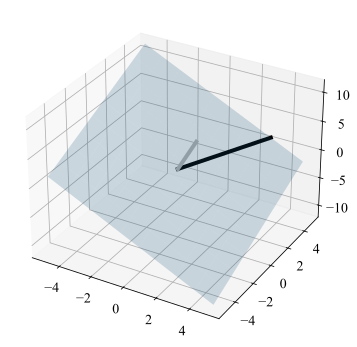

In [5]:
A = np.array([[3,0],
             [5,2],
             [1,2]])

ax = plt.figure(figsize=(6,6)).add_subplot(111, projection='3d')

xx, yy = np.meshgrid(np.linspace(-5,5,10), np.linspace(-5,5,10))
cp = np.cross(A[:,0], A[:,1]) # 두 벡터의 외적 계산 -> 평면의 법선 벡터 구하기(수직인 벡터)
z1 = (-cp[0]*xx - cp[1]*yy)/cp[2] # 평면의 방정식(cp[0]*x + cp[1]*y + cp[2]*z = 0) 을 z에 대해 정리
ax.plot_surface(xx,yy, z1, alpha=.2)

ax.plot([0, A[0,0]], [0,A[1,0]], [0, A[2,0]], color=color[0], linewidth=4)
ax.plot([0, A[0,1]], [0,A[1,1]], [0, A[2,1]], color=color[1], linewidth=4)

plt.savefig('Figure_05_03.png', dpi=600)
plt.show()

# Null spaces(영공간)
- 행렬 𝐴에 대해 𝐴⋅𝑥 = 0 을 만족하는 모든 벡터 𝑥들의 집합

In [6]:
A = np.array([[1,-1], [-2,2]]) #서로 선형 종속 -> 계수 = 1(즉, Ax=0이 되는 해가 존재한다)
B = np.array([[1,-1], [-2,3]]) #서로 선형 독립 -> 계수 = 2(즉, Ax=0이 되는 해는 0벡터밖에 없다 = null sapce는 존재하지 않음)

print(scipy.linalg.null_space(A))
print('  ')
print(scipy.linalg.null_space(B))

[[0.70710678]
 [0.70710678]]
  
[]


In [7]:
A[1,0]

np.int64(-2)

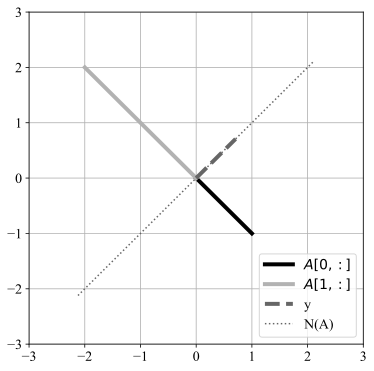

In [8]:
nullvect = scipy.linalg.null_space(A)

xlim = [-3, 3]
color = [[0,0,0], [.7,.7,.7]]

plt.figure(figsize=(6,6))

for i in range(2):
    plt.plot([0, A[i,0]], [0, A[i,1]], color=color[i], linewidth=4, label='$A[{{%g,:}}]$'%i)

plt.plot([0, nullvect[0,0]], [0, nullvect[1,0]], '--', color=[.4,.4,.4], linewidth=4, label='y') #null space 직선

plt.plot([xlim[0]*nullvect[0,0], xlim[1]*nullvect[0,0]],
         [xlim[0]*nullvect[1,0], xlim[1]*nullvect[1,0]],
         ':', color=[.4,.4,.4], label='N(A)') #null space의 전체 선을 길게 그림

plt.xlim(xlim)
plt.ylim(xlim)
plt.grid()
plt.legend()

plt.savefig('Figure_05_04.png', dpi=600)
plt.show()

## Exercise 1

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


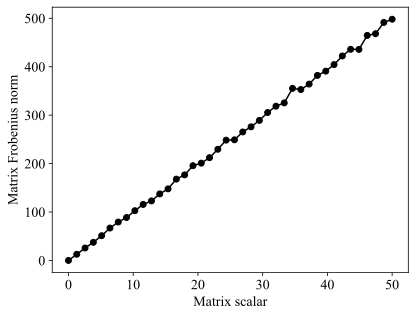

In [9]:
scalingVals = np.linspace(0,50,40)
nExperiments = 10

#initialize output
matrixNorms = np.zeros((len(scalingVals), nExperiments))

for si in range(len(scalingVals)):
    for expi in range(nExperiments):
        R = np.random.randn(10,10) * scalingVals[si]

        matrixNorms[si, expi] = np.linalg.norm(R, 'fro')

plt.plot(scalingVals, np.mean(matrixNorms, axis=1), 'ko-')
plt.xlabel('Matrix scalar')
plt.ylabel('Matrix Frobenius norm')
plt.savefig('Figure_05_07.png', dpi=600)

print(matrixNorms[0, :])

#결과 해석
## 노름은 항상 >= 0 이다(0행렬이 0)

## Exercise 2

In [10]:
def EuclideanDistance(M1, M2):
    D=M1-M2

    return np.sqrt(np.sum(D**2))

In [11]:
N = 7
A = np.random.randn(N,N)
B = np.random.randn(N,N)

numIters=0
s=1
while EuclideanDistance(s*A, s*B)>1:
    s *= .9
    numIters += 1

print(f'Number of iterations: {numIters-1}')
print(f'Final value of scalar: {s/.9:.3f}')
print(f'Final Euclidean distance: {EuclideanDistance(s/.9*A, s/.9*B):.3f}')

Number of iterations: 22
Final value of scalar: 0.098
Final Euclidean distance: 1.006


Text(0, 0.5, 'Count')

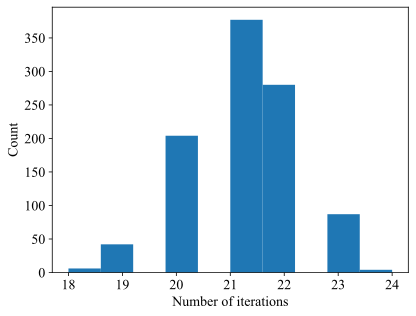

In [12]:
nIters = np.zeros(1000)

for i in range(1000):
    A = np.random.randn(N,N)
    B = np.random.randn(N,N)

    numIters, s = 0,1
    while EuclideanDistance(s*A, s*B)>1:
        s *= .9
        numIters +=1
    nIters[i] = numIters-1

plt.hist(nIters)
plt.xlabel('Number of iterations')
plt.ylabel('Count')

#결과 해석 : 20번 정도 스케일링을 시도했을 때 1이하의 거리가 되었다.

## Exercise 3

In [13]:
M = 50
A = np.random.randn(M, M)

# trace method(대각합 연산)
norm1 = np.sqrt(np.sum(np.diag(A.T@A)))

# Euclidean norm method(프로베니우스 노름)
norm2 = np.sqrt(np.sum(A**2))

norm1-norm2 # 두 방식의 결과는 서로 같기 때문에 결과가 0

np.float64(0.0)

## Exercise 4

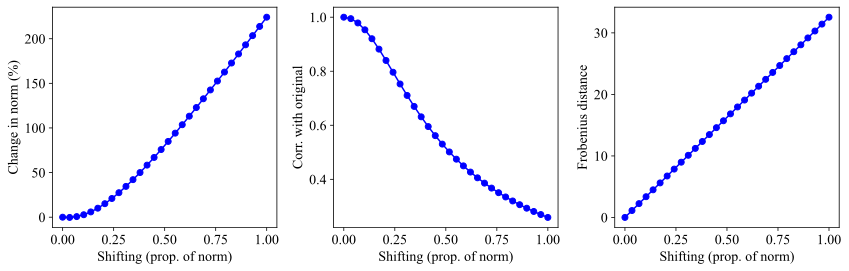

In [14]:
N=10

shifting = np.linspace(0,1,30) #(start, end, num(생성할 값의 개수)) : start~end 균등하게 나눈 num개의 실수를 갖는 1차원 배열

A = np.random.randn(N,N)
normA = np.linalg.norm(A, 'fro') #fro : frobenius norm을 계산

shiftingResults = np.zeros((len(shifting), 3)) #(30,3)
resultsNames = ['Change in norm (%)', 'Corr. with original', 'Frobenius distance'] # A의 크기 변화, A와 As의 상관계수, A와 As 사이의 거리(수치적 차이)

for si in range(len(shifting)):
    As = A + shifting[si]*normA*np.eye(N) # A에 항등행렬(np.eye)을 곱한 항을 더함으로써 A를 변형(이동)시킴

    normShift = np.linalg.norm(As, 'fro')
    shiftingResults[si,0] = 100*(normShift-normA)/normA # A에서 얼마나 크기(노름)가 변했는지 백분율로 저장
    
    # compute correlation
    shiftingResults[si,1] = np.corrcoef(A.flatten(), As.flatten())[0,1] # A와 As를 1차원으로 펼쳐서 상관계수 계산(구조가 얼마나 비슷한지 확인)
    
    # Frobenius distance
    shiftingResults[si,2] = EuclideanDistance(A, As) #A와 As 사이의 Frobenius 거리(차이 정도) 계산

_, axs = plt.subplots(1,3,figsize=(12,4))

for i in range(3):
    axs[i].plot(shifting, shiftingResults[:,i], 'bo-')
    axs[i].set_xlabel('Shifting (prop. of norm)') #이동(노름 비율)
    axs[i].set_ylabel(resultsNames[i])

plt.tight_layout()
plt.savefig('Figure_05_06.png', dpi=600)
plt.show()

#결과 해석
## 01 : 전체 크기 변화 -> shifting 비율이 증가할수록 행렬의 크기(norm)도 커짐
## 02 : 구조적 유사도 -> shifting 비율이 증가할수록 As는 A에서 대각 성분만 점점 커진 행렬이 되므로 구조가 점점 달라짐 -> 상관계수 감소
## 03 : 수치적 차이 -> shifting 비율이 증가할수록 A와 As사이의 거리(차이)도 커짐

## Exercise 5

In [15]:
M = 5
N = 8
r = 3

A = np.random.randn(M,r) @ np.random.randn(r, N)

print(A.shape)
print(np.linalg.matrix_rank(A))
print('\n')
print(A)

(5, 8)
3


[[-1.47813538 -0.36647635 -0.96109593 -0.39545942  0.30319502  1.58625255
   1.32121825  0.31785254]
 [-4.56509722 -5.54600593 -5.00232894 -1.74549576  5.03928138  4.10366476
   1.64012456 -0.44165563]
 [ 1.40375211  6.56889549  1.82851908 -0.32156526 -4.64031816  0.50356105
   1.40928575  2.16885797]
 [-1.20626678 -0.32734943 -1.65436961 -0.95685162  0.90183844  1.68000507
   0.72204604  0.45448641]
 [ 4.31416944  0.21761398 -0.04868022 -0.75841121  1.71085648 -3.6615055
  -5.30514965 -0.61596246]]


## Exercise 6

In [16]:
# summed matrix has rank-0

A = np.diag([1,0,0,0,0])
B = np.diag([-1,0,0,0,0])
C = A+B

np.linalg.matrix_rank(A), np.linalg.matrix_rank(B), np.linalg.matrix_rank(C)

# 결과 해석
## A, B는 서로 계수가 1인데 A에 -1을 곱하면 B가 되므로 C는 계수가 0이다. 
## 따라서, r(A+B) <= r(A) + r(B) 성립

(np.int64(1), np.int64(1), np.int64(0))

In [17]:
# summed matrix has rank-1

A = np.diag([1,0,0,0,0])
B = np.zeros(A.shape) # (5,5)
B[0,1] = 10
C = A+B

np.linalg.matrix_rank(A), np.linalg.matrix_rank(B), np.linalg.matrix_rank(C)

# 결과 해석
## A, B는 서로 계수가 1이고, C는 A+B에서 첫행이 [1,10,0,0,0]이고 나머지가 0이므로 계수가 1이다. 
## 따라서, r(A+B) <= r(A) + r(B) 성립

(np.int64(1), np.int64(1), np.int64(1))

In [18]:
# summed matrix has rank-2

A = np.diag([1,0,0,0,0])
B = np.diag([0,1,0,0,0])
C = A+B

np.linalg.matrix_rank(A), np.linalg.matrix_rank(B), np.linalg.matrix_rank(C)

# 결과 해석
## A, B는 서로 계수가 1이고, C는 A+B에서 첫행이 [1,0,0,0,0]이고 두번째 행이 [0,1,0,0,0]이고 나머지가 0이므로 계수가 2이다. 
## 따라서, r(A+B) <= r(A) + r(B) 성립

(np.int64(1), np.int64(1), np.int64(2))

In [19]:
# random matrices have maximum possible rank!

A = np.random.randn(5,1) @ np.random.randn(1,5) #외적(모든 행이 하나의 방향성만 있음=1차원) -> 즉, A = u@v.T 형태로, 하나의 벡터 u를 v의 각 성분으로 scale한 것 = 모든 행/열이 서로 선형 종속 = 계수 1
B = np.random.randn(5,1) @ np.random.randn(1,5)
C = A+B

np.linalg.matrix_rank(A), np.linalg.matrix_rank(B), np.linalg.matrix_rank(C)

# 결과 해석
## A, B는 서로 계수가 1이고, C는 A+B이므로 1+1을 하여 계수가 2이다. 
## 따라서, r(A+B) <= r(A) + r(B) 성립

(np.int64(1), np.int64(1), np.int64(2))

## Exercise 7

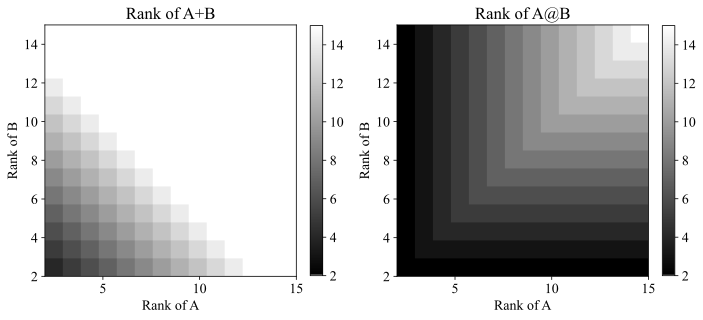

In [20]:
def makeAmatrix(M, r):
    return np.random.randn(M, r) @ np.random.randn(r, M)

matSize = 20 # matrix size
rs = range(2, 16) #range of ranks

# initialize results matrix
Ranks = np.zeros((len(rs), len(rs), 2)) #(14,14,2)

for i in range(len(rs)):
    for j in range(len(rs)):

        S = makeAmatrix(matSize, rs[i]) + makeAmatrix(matSize, rs[j]) # sum
        M = makeAmatrix(matSize, rs[i]) @ makeAmatrix(matSize, rs[j]) # dot product

        # compute their ranks
        Ranks[i, j, 0] = np.linalg.matrix_rank(S)
        Ranks[i, j, 1] = np.linalg.matrix_rank(M)

fig, axs = plt.subplots(1,2, figsize=(10,6))
s = '+@' #symbols for title(sum, dot product)

for i in range(2):

    h = axs[i].imshow(Ranks[:,:,i], vmin=np.min(rs), vmax=np.max(rs), origin='lower',
                      extent=(rs[0], rs[-1], rs[0], rs[-1]), cmap='gray')
    
    fig.colorbar(h, ax=axs[i], fraction=.045)
    axs[i].set_xlabel('Rank of A')
    axs[i].set_ylabel('Rank of B')
    axs[i].set_title(f'Rank of A{s[i]}B')


plt.savefig('Figure_05_09.png', dpi=600)
plt.tight_layout()
plt.show()

# 결과 해석
## A+B -> A,B 각각의 랭크값이 커질수록 A+B의 랭크도 커진다. 단, 20*20 행렬이므로 20을 넘지는 않음
## A@B -> rank(A,B) <= min(rank(A), rank(B))이므로, 항상 작은 랭크에 의해 최종 랭크가 결정됨 -> A,B의 랭크가 동일한 대각선을 기준으로 점점 색이 밝아짐, 랭크가 작은 쪽의 색상으로 맞춰짐
### ex. rank(A) = 12 , rank(B) = 14 -> rank(A)의 값이 더 작으므로 해당 교점(12,14)는 12 색상임 

## Exercise 8

In [21]:
M = 15
N = 8
r = 4

A = np.random.randn(M,r) @ np.random.randn(r,N)
At = A.T
AtA = A.T@A
AAt = A@A.T

print(
    np.linalg.matrix_rank(A),
    np.linalg.matrix_rank(At),
    np.linalg.matrix_rank(AtA),
    np.linalg.matrix_rank(AAt)
)

4 4 4 4


## Exercise 9

In [22]:
def is_V_inColA(A,v): #v가 A의 열로 생성할 수 있는지(선형 결합으로 표현 가능한지 확인)
    
    # 차원 체크(v의 길이와 A의 행 수가 같아야 함 => 즉, 같은 공간에 있어야 비교 가능)
    if A.shape[0]!=v.shape[0]:
        raise Exception('Size mismatch! A and v must have the same column dimensionality!')
    
    rankA = np.linalg.matrix_rank(A)
    rankAv = np.linalg.matrix_rank(np.hstack((A,v))) # 오른쪽으로 추가(확장 행렬)

    return rankA == rankAv # v가 C(A) 이면 T 아니면 F 출력

A = np.random.randn(4,3)
v = np.random.randn(4,1)

is_V_inColA(A,v) 

# 결과 해석
## A의 3개의 열로 v를 만들 수 있는지 검사 -> 대부분 False (랜덤이므로 독립적일 가능성이 높다)

np.False_

## Exercise 10

[[-5.78974370e-01 -5.78974370e-01  1.16778126e+00 -1.72881230e+00
   8.34069371e-02 -9.17970178e-02 -1.30156742e-01 -4.77824627e-01
   1.87720893e-01 -7.51163962e-01 -1.92343755e+00  3.06426567e-01
  -2.15410355e-01 -1.07545333e-01 -1.33561085e+00 -1.72309556e+00
   1.76693678e+00 -9.87499845e-02  1.96652423e+00  2.87048127e-01
   2.82505396e-01  1.70549815e-01 -1.50733024e-01 -8.52124173e-02
   1.74227071e+00 -4.58089586e-01 -2.28839740e-01 -1.91760203e-01
  -7.67098883e-01 -6.41957954e-01]
 [-1.38110557e+00 -1.38110557e+00  2.15325078e-01  3.65548083e-01
   7.57210292e-01 -8.76926902e-01  4.43133452e-01  1.00549580e-01
   5.72696819e-01 -7.66553283e-02  1.10630785e+00 -4.43244456e-01
   5.71221947e-01  9.68301605e-01 -1.32543329e+00  2.47079218e-01
   5.95522721e-01 -5.36913206e-01 -8.58105724e-01 -1.04549162e+00
  -5.53486197e-01 -9.70696362e-01  8.90757059e-01 -1.40212399e+00
   8.68971994e-01 -8.02749258e-01  5.31868366e-01 -6.06116652e-01
   7.99263267e-01  7.31580911e-01]
 [-9.5

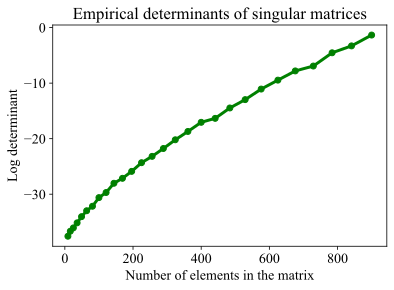

In [23]:
ns = np.arange(3,31) #28개

iters=100

dets=np.zeros((len(ns), iters)) # 28*100

for ni in range(len(ns)): #28
    for i in range(iters):

        A = np.random.randn(ns[ni], ns[ni])
        A[:,0] = A[:,1] #첫번째 열 = 두번째 열(완전 선형 종속) -> 축소 행렬(특이 행렬)이므로 행렬식은 0이거나 0에 가깝다.
        dets[ni,i] = np.abs(np.linalg.det(A))

print(A) #첫번째열과 두번째열이 동일함
print('\n')

plt.figure(figsize=(6,4))
plt.plot(ns**2, np.log(np.mean(dets, axis=1)), 'go-', linewidth=3) #행렬식은 매우 작은 값을 가질 수 있으므로 log를 취해서 값을 확장시킴
plt.xlabel('Number of elements in the matrix')
plt.ylabel('Log determinant')
plt.title('Empirical determinants of singular matrices') #특이 행렬의 실험적 행렬식
plt.savefig('Figure_05_10.png', dpi=600)
plt.show()

# 결과 해석
## 목적 : 서로 선형 종속된 열을 가진 특이행렬 A의 행렬식 값이 행렬의 크기가 커질수록 어떤 경향을 보이는지 확인
## 결과 : 행렬의 크기가 커질수록 행렬식이 작아짐(log값이 0에 가까워짐) - 행렬의 크기가 커질수록 -> 선형 종속적인 열이 많아지므로 0에 가까워진다.